
# Amazon Sales Analysis Project

This project aims to analyze Amazon sales data to extract valuable insights, explore trends, and generate visualizations.
The notebook includes data preprocessing, feature engineering, exploratory data analysis (EDA), and advanced insights using machine learning techniques.

The following sections are covered:
1. Data Preprocessing and Feature Engineering
2. Exploratory Data Analysis
3. Customer Segmentation
4. Sales Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Amazon Sales Analysis/')
file_path = "Amazon Sale Report.csv"
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Display basic information about the dataset to understand its structure and identify potential issues
- This helps us see the data types, number of non-null values, and memory usage, which is crucial for identifying missing or incorrect data types.
- By displaying the first few rows, we can get an idea of the columns, data types, and potential anomalies.

In [ ]:
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


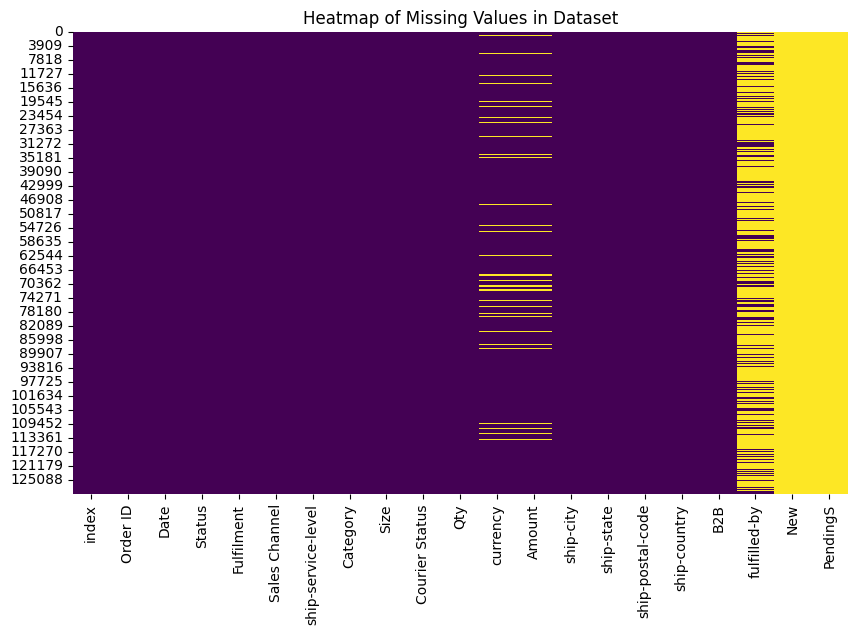

In [ ]:
# heatmaps help in understanding which columns have missing data and need cleaning.
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show()

Columns such as 'index', 'New', and 'PendingS' seem irrelevant based on their names and initial exploration.
- 'index' appears to be a redundant identifier as pandas already provides an index.
- 'New' and 'PendingS' have all null values, making them irrelevant for analysis.
remove these columns during the cleaning process.

In [ ]:
# These columns have been identified as redundant or having no meaningful data, so they are removed to simplify the dataset.
data_cleaned = data.drop(columns=['index', 'New', 'PendingS'])

# Converting 'Date' to datetime format allows for easier analysis and visualization of sales trends over time.
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Rows with invalid dates (NaT) are dropped, as they cannot be used for time-based analysis.
data_cleaned.dropna(subset=['Date'], inplace=True)

# missing values in 'fulfilled-b' are replaced with 'Unknown' to maintain data consistency while not losing rows with valuable information.
data_cleaned['fulfilled-by'].fillna('Unknown', inplace=True)

# Since 'Amount' and 'currency' are key to understanding sales, rows with missing values in these columns are removed.
data_cleaned.dropna(subset=['Amount', 'currency', 'ship-postal-code'], inplace=True)
data_cleaned['ship-postal-code'] = data_cleaned['ship-postal-code'].astype('int')
data_cleaned['AvgSalePerOrder'] = data_cleaned.groupby('ship-postal-code')['Amount'].transform('mean')
holidays = ['2023-12-25', '2023-01-01']  # Example holiday dates
data_cleaned['IsHoliday'] = data_cleaned['Date'].isin(pd.to_datetime(holidays)).astype(int)

# ENHANCED: Add 'Revenue Category' based on sales amount: Low, Medium, High
data_cleaned['Revenue Category'] = pd.cut(data_cleaned['Amount'],
                                        bins=[0, 500, 1000, np.inf],
                                        labels=['Low', 'Medium', 'High'])


# verify that the dataset is now clean and ready for further analysis, with no irrelevant columns or major missing values.
data_cleaned.info()
data_cleaned.head()

<ipython-input-54-92e8e07668d1>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')
<ipython-input-54-92e8e07668d1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['fulfilled-by'].fillna('Unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121143 non-null  object        
 1   Date                121143 non-null  datetime64[ns]
 2   Status              121143 non-null  object        
 3   Fulfilment          121143 non-null  object        
 4   Sales Channel       121143 non-null  object        
 5   ship-service-level  121143 non-null  object        
 6   Category            121143 non-null  object        
 7   Size                121143 non-null  object        
 8   Courier Status      121143 non-null  object        
 9   Qty                 121143 non-null  int64         
 10  currency            121143 non-null  object        
 11  Amount              121143 non-null  float64       
 12  ship-city           121143 non-null  object        
 13  ship-state          121143 non-nul

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,AvgSalePerOrder,IsHoliday,Revenue Category
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,668.162821,0,Medium
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,612.326425,0,Low
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Unknown,649.070182,0,Low
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,609.950222,0,Medium
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,...,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Unknown,617.293350,0,Medium


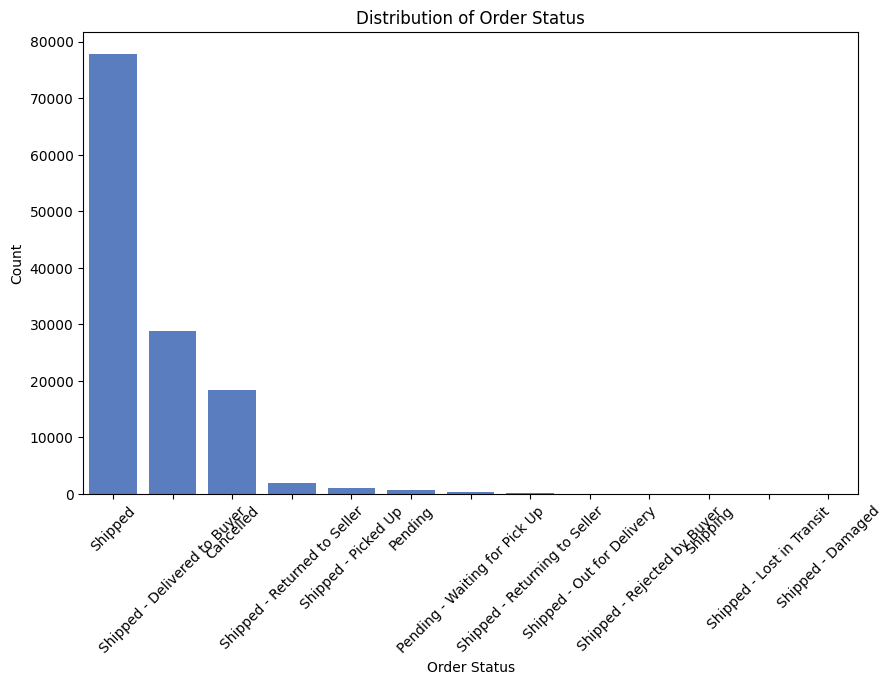

In [ ]:
# Plot the distribution of order status to understand the proportion of different statuses
# This helps us identify the most common order statuses, such as 'Shipped', 'Cancelled', etc., which may be useful for analyzing order fulfillment efficiency.
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=data, order=data['Status'].value_counts().index)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

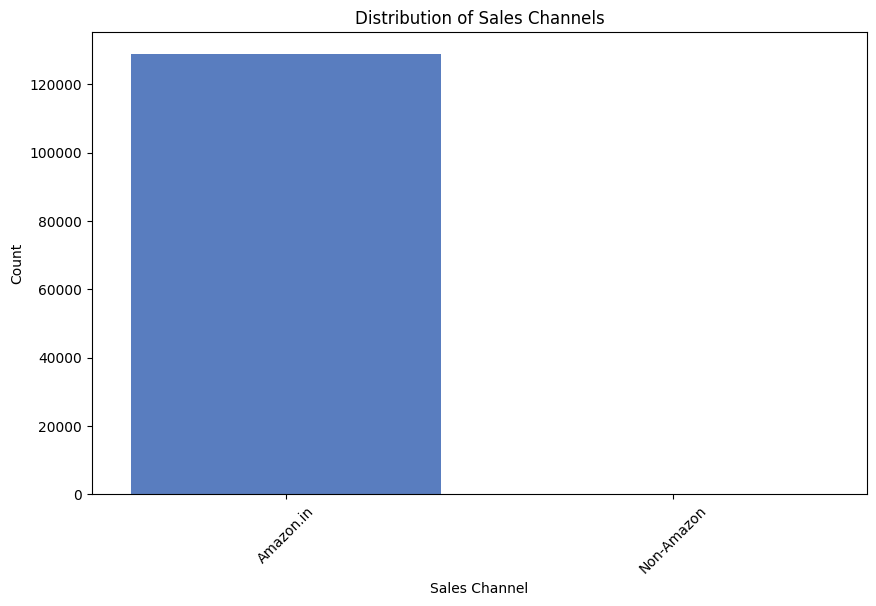

In [ ]:
# Visualize the sales channel distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales Channel', data=data, order=data['Sales Channel'].value_counts().index)
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

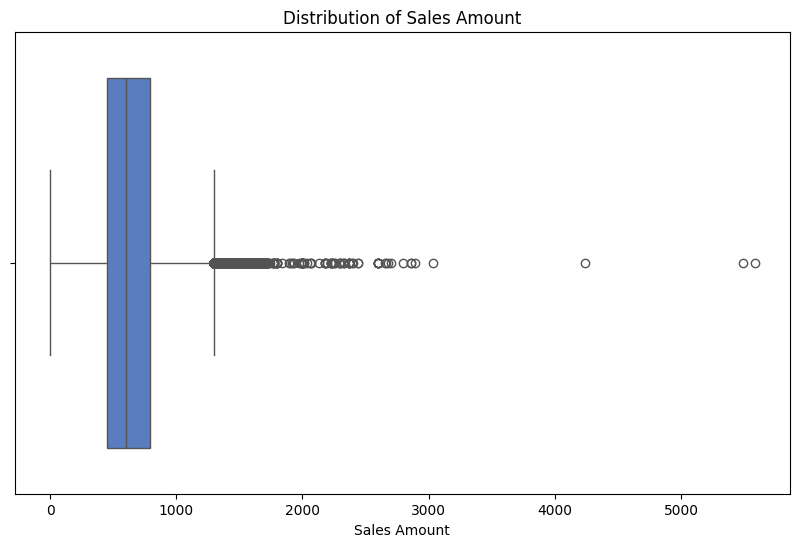

In [ ]:
# Plot sales amount distribution to identify any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=data)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.show()

- There are several outliers with significantly higher sales amounts, suggesting a small number of high-value transactions.
- The majority of sales are concentrated below 1000, indicating a positive skew in the data.
- Outliers may need special handling, such as separate analysis or removal, to avoid distorting summary statistics like the mean.

In [ ]:
pd.isnull(data_cleaned).sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0
Qty,0


In [ ]:
data_cleaned.shape

(121143, 21)

In [ ]:
data_cleaned.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'AvgSalePerOrder', 'IsHoliday',
       'Revenue Category'],
      dtype='object')

In [ ]:
# Derive new features: Total Sales per City and Average Amount per Order
# - 'Total Sales per City': Summing the sales amount for each city to identify which locations have the highest sales.
# - 'Average Amount per Order': Calculating the average sales amount per order ID to understand customer spending behavior.
sales_per_city = data_cleaned.groupby('ship-city')['Amount'].sum().reset_index()
average_order_amount = data_cleaned.groupby('Order ID')['Amount'].mean().reset_index()

In [ ]:
# Extract Year, Month, and Day of Week from 'Date'
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Quarter'] = data_cleaned['Date'].dt.quarter
data_cleaned['DayOfWeek'] = data_cleaned['Date'].dt.dayofweek

In [ ]:
data.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


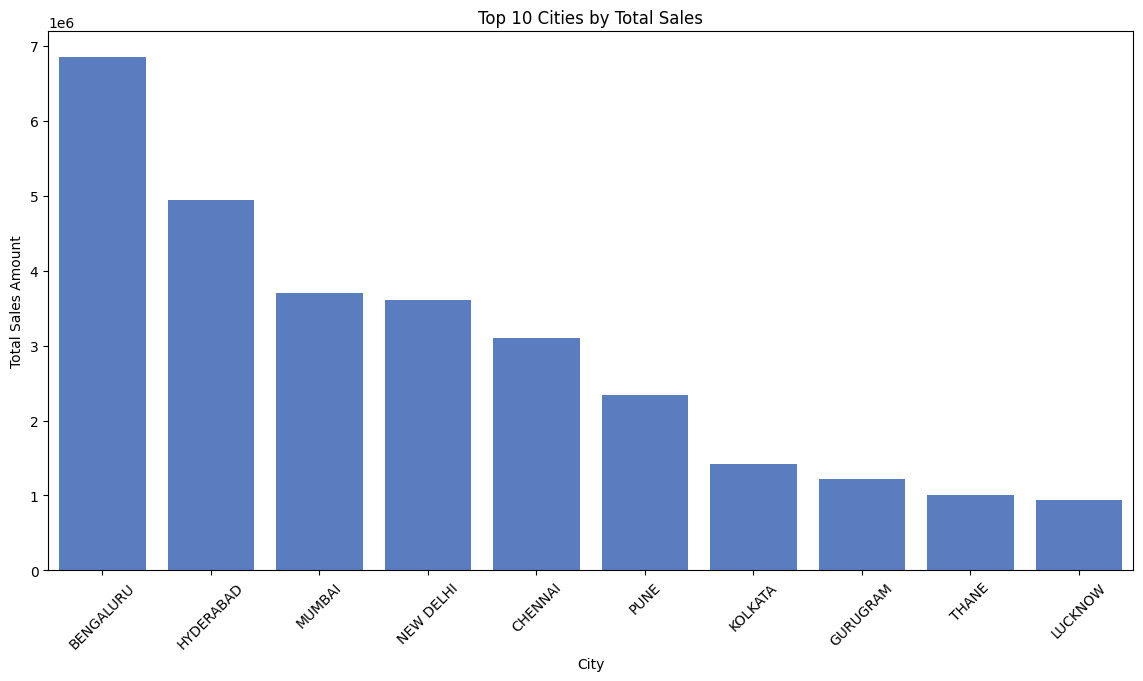

In [ ]:
# Use bar plot to show the top 10 cities by total sales, which helps identify major sales locations and potential markets.
plt.figure(figsize=(14, 7))
sns.barplot(x='ship-city', y='Amount', data=sales_per_city.sort_values('Amount', ascending=False).head(10))
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

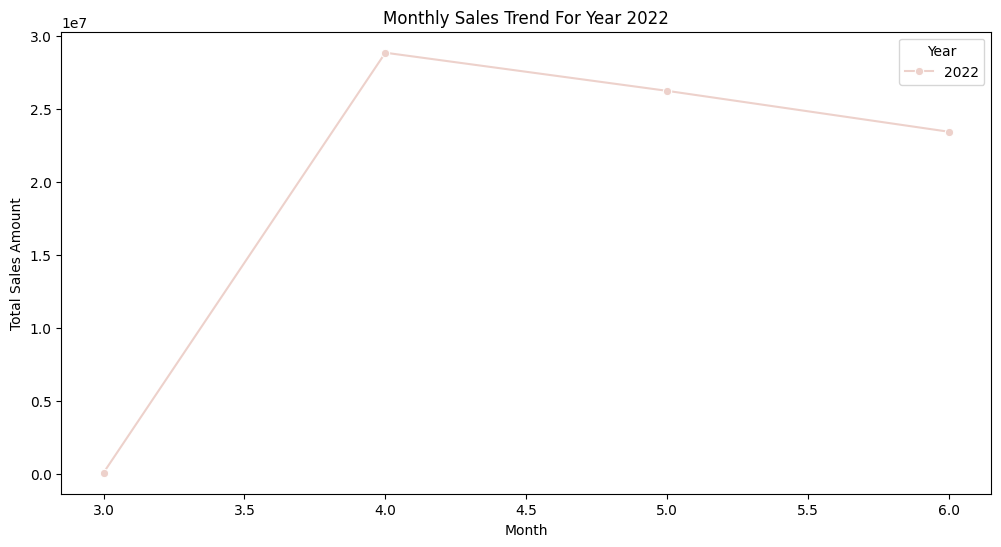

In [ ]:
# Visualize monthly sales trend analysis
# This line plot shows the sales trends by month and year to better understand seasonality.
monthly_sales = data_cleaned.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend For Year 2022')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


<ipython-input-66-199722ce8ff4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Amount', data=data_cleaned, ci=None)


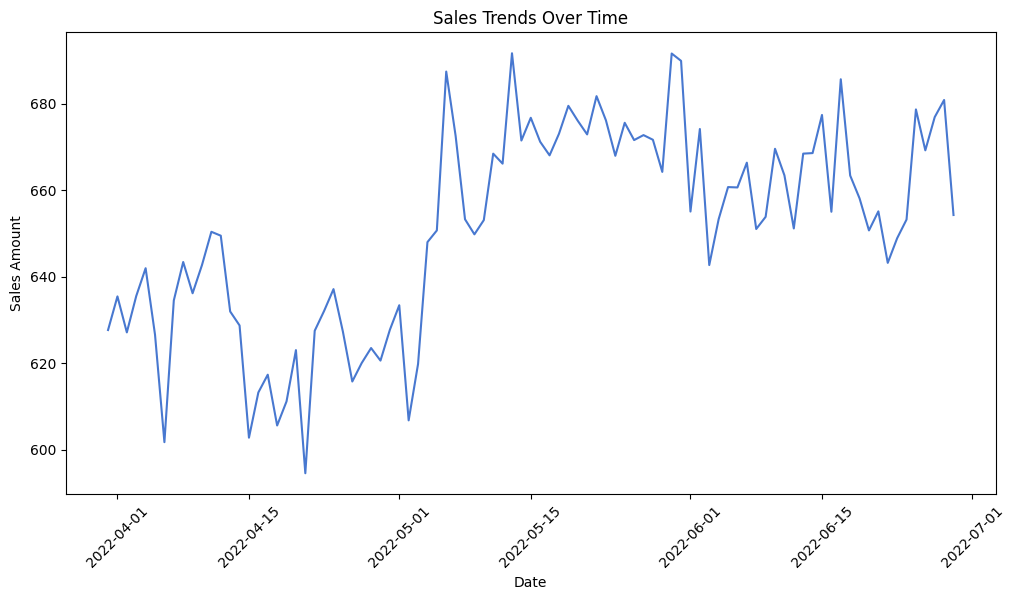

In [ ]:
# def plot_sales_trends(data):
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=data_cleaned, ci=None)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# plot_sales_trends(data_cleaned)

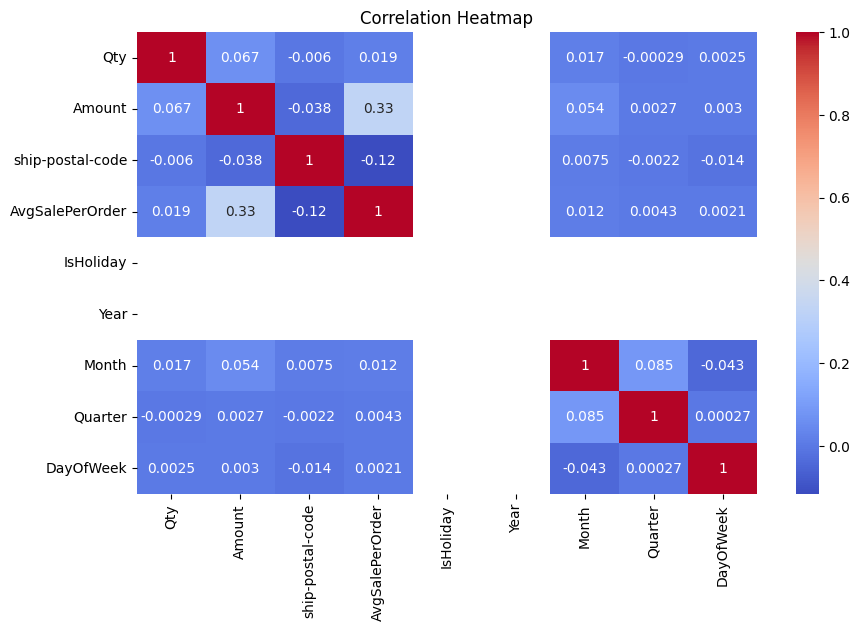

In [ ]:
# Correlation Analysis
# Selecting only numerical columns for correlation analysis
numeric_data = data_cleaned.select_dtypes(include=['number'])

# A heatmap is used to visualize correlations between numerical features to identify any strong relationships.
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Saving the cleaned data to a CSV file allows for further analysis or use in future steps of the project.
data_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Sales Analysis/Amazon_Sales_Cleaned.csv', index=False)

In [ ]:
data.shape

(128976, 21)

In [ ]:
data_cleaned.shape

(121143, 25)

## Exploratory Data Analysis

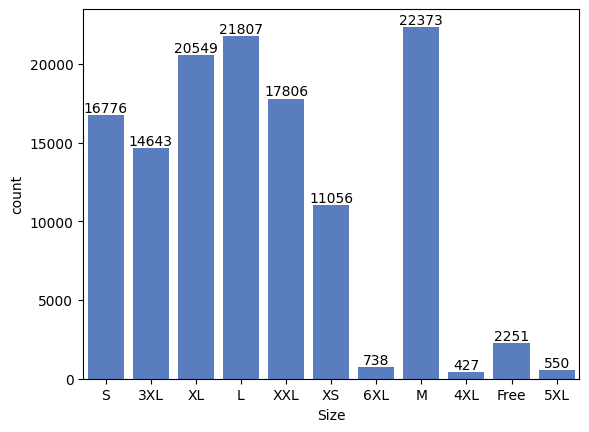

In [ ]:
ax=sns.countplot(x='Size',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can see most of the people buy M-size

## Groupby

The groupby() function in pandas is used to group data based on one or more columns in a DataFrame.

    Size    Qty
6      M  20138
5      L  19706
8     XL  18636
10   XXL  16246
7      S  15041
0    3XL  13360
9     XS   9850
4   Free   2070
3    6XL    688
2    5XL    513
1    4XL    398


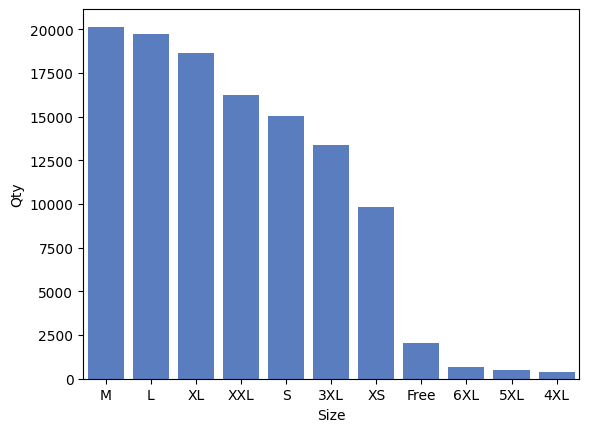

In [ ]:
quant = data.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size',y='Qty',data=quant)
print(quant)

From above graph you can see that most of the Qty buys M-size in sales

## Courier status

In [ ]:
data.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN


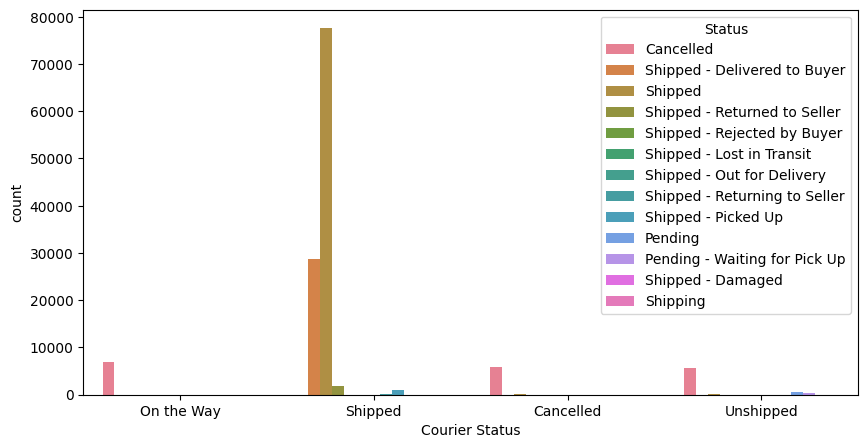

In [ ]:
# to get figure size, we're using matplotlib(plt)

plt.figure(figsize=(10,5))
ax=sns.countplot(data=data, x='Courier Status', hue='Status')
plt.show()

From above graph the majority of the orders are shipped through the courier.

<Axes: >

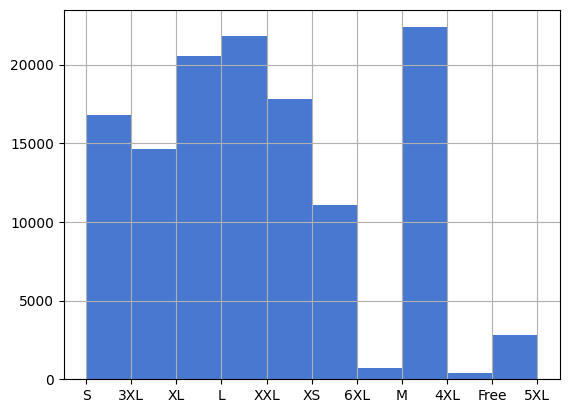

In [ ]:
# we're making histogram om Size
data['Size'].hist()

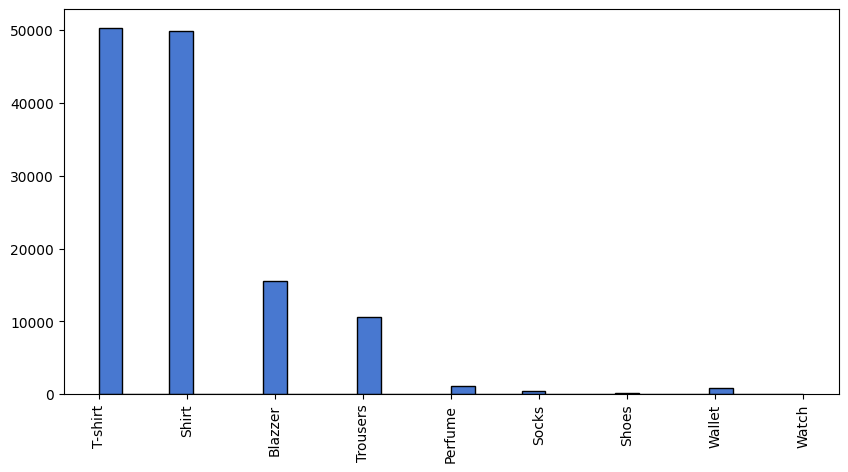

In [ ]:
# we convert Category to string
# we made a variable called column_data
# "bins" is used for distance between bars
data['Category'] = data['Category'].astype(str)
column_data = data['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data,bins=30,edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

From above graph you can see that most bought items are T-shirts

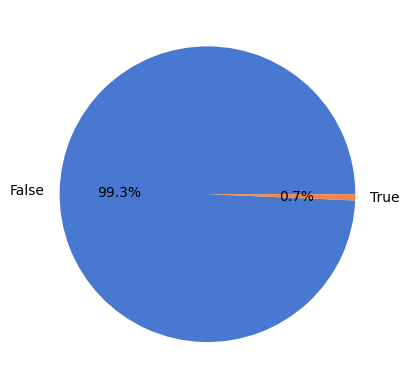

In [ ]:
# checking B2B Data using pie chart
B2B_Check = data['B2B'].value_counts()

# plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
# plt.axis('equal')
plt.show()

# plt is used for matplotlib
# .index - to get label name displayed

From the above chart we can see that, maximum i.e 99.2% buyers are retailers and 0.8% are B2B buyers.

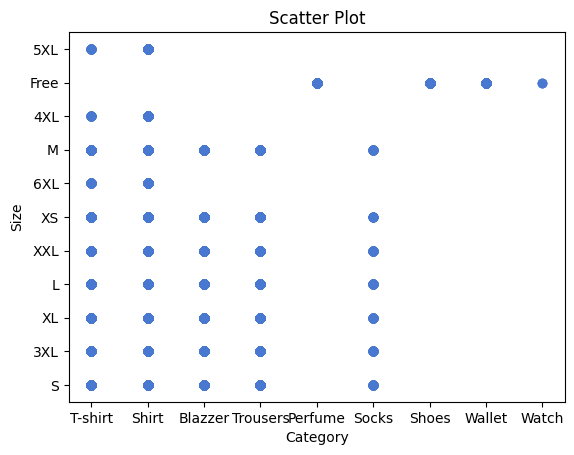

In [ ]:
# we use scatter plot to find how many data and how much and different types of size

# prepare data for scatter plot
x_data = data['Category']
y_data = data['Size']

# plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

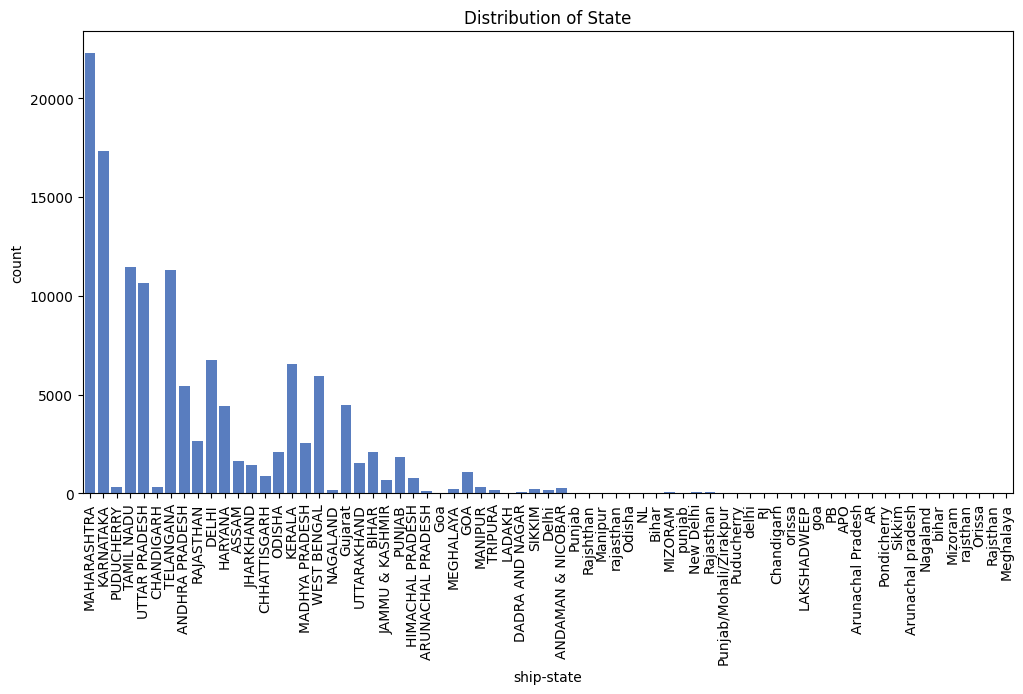

In [ ]:
# Plot count of cities by state

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

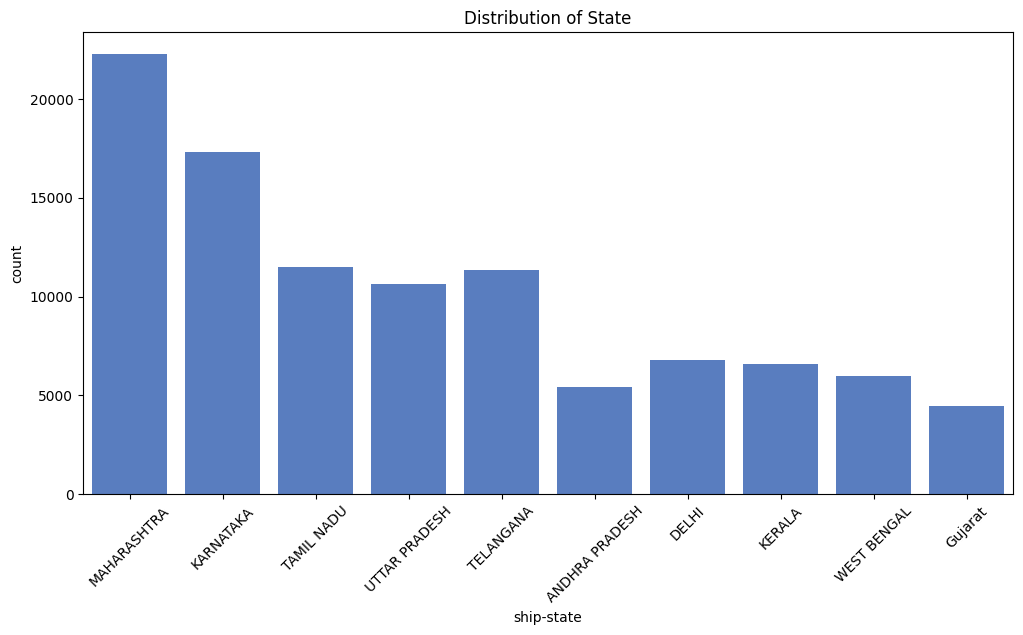

In [ ]:
# Top 10 states
top_10_states = data['ship-state'].value_counts().head(10)

# Plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=data[data['ship-state'].isin(top_10_states.index)], x= 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=45)
plt.show()

From above graph you can see that most of the buyers are from Maharashtra state.

## Conclusion

The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfils orders through Amazon, exeriences high demand for T-shirts, and sees M-size as the preferred choice among buyers.


## 1. Data Preprocessing and Feature Engineering

In this section, we will clean the dataset, handle missing values, and add new features to enhance our analysis.
The newly added features include:
- **Month** and **Year** extracted from the `Date` column.
- **Revenue Category** to classify sales as Low, Medium, or High.



## 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is crucial to understanding the dataset, discovering patterns, and identifying trends. In this section, we will perform:
- Sales trend analysis over time
- Category-based revenue distribution
- Customer behavior analysis

We will use a consistent **blue and orange** color theme to make the visualizations professional and cohesive.



### 2.1 Sales Trends Over Time

We will visualize sales trends over time to observe patterns and seasonality.


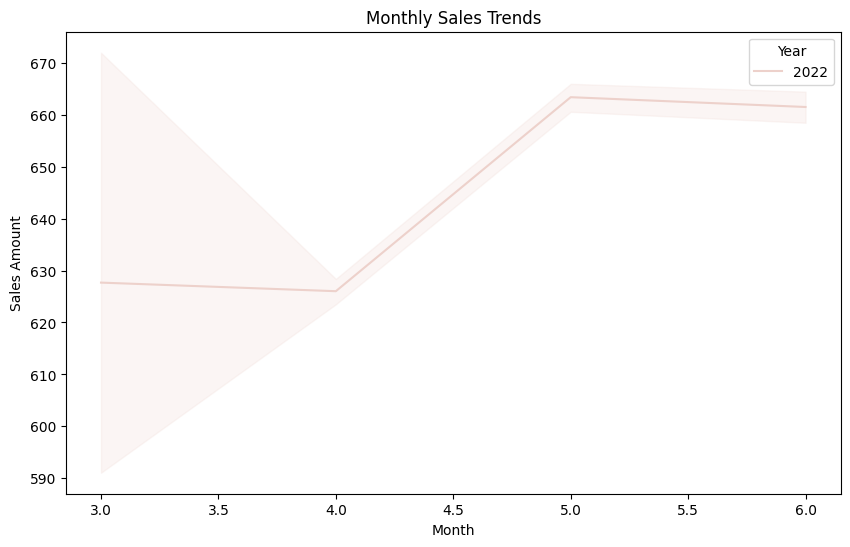

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set custom color theme
sns.set_palette('muted')  # Setting a consistent blue and orange theme

# Plotting sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x='Month', y='Amount', hue='Year')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()



### 2.2 Revenue Distribution by Category

This plot will help us understand which categories are contributing the most to the sales revenue.


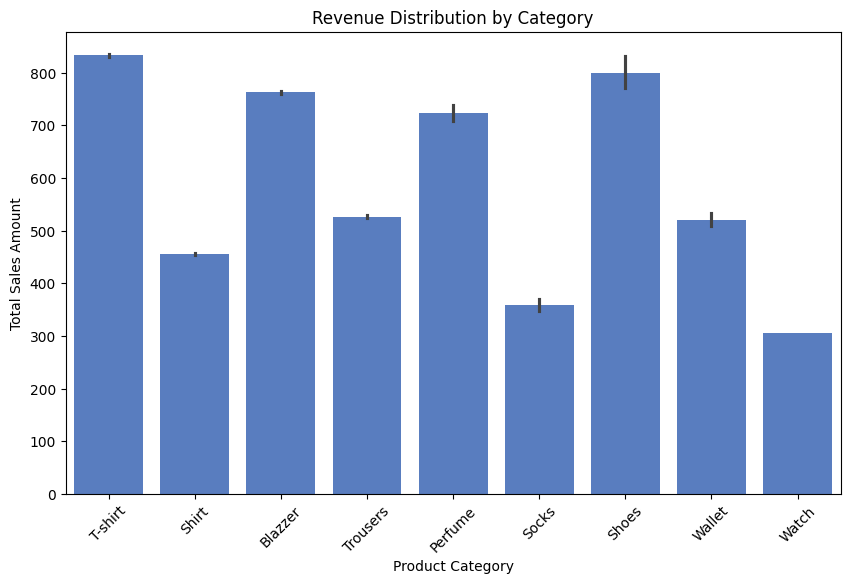

In [ ]:

# Plotting revenue distribution by category
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x='Category', y='Amount')
plt.title('Revenue Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()



## 3. Customer Segmentation

To better understand our customers, we perform customer segmentation using clustering techniques like k-means.
This analysis helps identify different types of customers based on their purchasing behaviors.


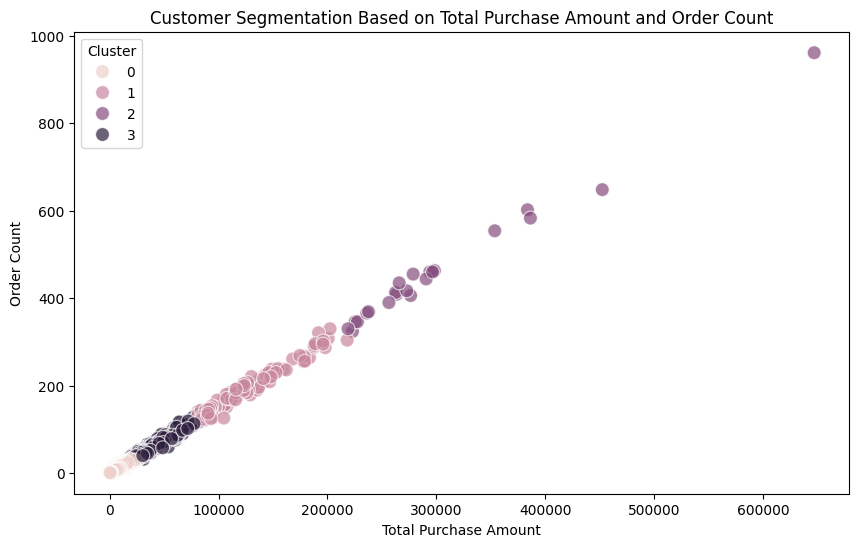

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Preparing data for clustering
customer_data = data_cleaned.groupby('ship-postal-code')['Amount'].agg(['sum', 'count']).reset_index()
customer_data.columns = ['Postal Code', 'Total Amount', 'Order Count']

# Scaling the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Total Amount', 'Order Count']])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualizing customer clusters using Total Amount vs Order Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Total Amount', y='Order Count', hue='Cluster', s=100, alpha=0.7)
plt.title('Customer Segmentation Based on Total Purchase Amount and Order Count')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Order Count')
plt.show()

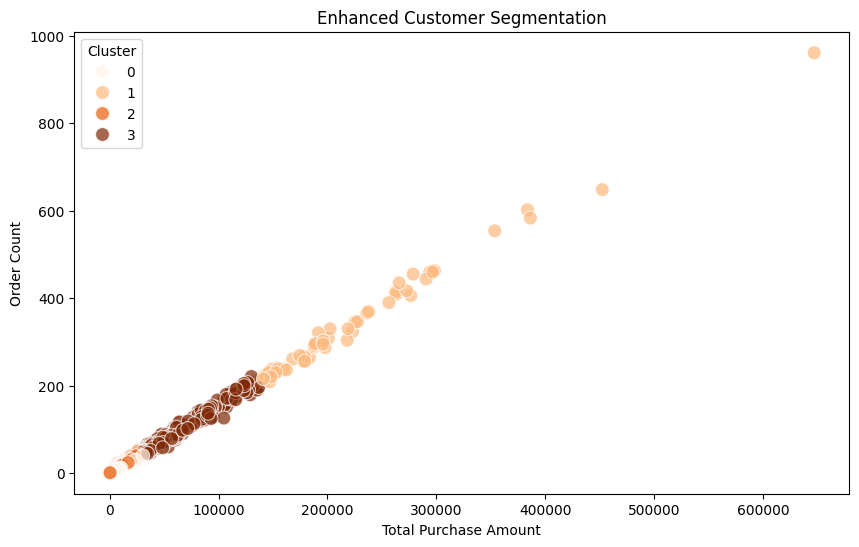

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Handling NaN values before scaling
data_cleaned['AvgSalePerOrder'] = data_cleaned['AvgSalePerOrder'].fillna(data_cleaned['AvgSalePerOrder'].median())

# Example creation if it's based on holidays
holidays = ['2023-12-25', '2023-01-01']  # Adjust dates as needed
data_cleaned['IsHoliday'] = data_cleaned['Date'].isin(pd.to_datetime(holidays)).astype(float)

# Preparing customer_data for clustering
customer_data = data_cleaned.groupby('ship-postal-code')['Amount'].agg(['sum', 'count']).reset_index()
customer_data.columns = ['Postal Code', 'Total Amount', 'Order Count']

# Adding 'AvgSalePerOrder' to customer_data
customer_data = customer_data.merge(
    data_cleaned[['ship-postal-code', 'AvgSalePerOrder']].groupby('ship-postal-code').mean().reset_index(),
    left_on='Postal Code',
    right_on='ship-postal-code',
    how='left'
).drop(columns='ship-postal-code')

# Adding 'HolidayRatio' to customer_data
customer_data = customer_data.merge(
    data_cleaned[['ship-postal-code', 'IsHoliday']].groupby('ship-postal-code').mean().reset_index(),
    left_on='Postal Code',
    right_on='ship-postal-code',
    how='left'
).drop(columns='ship-postal-code')

# Scaling the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Total Amount', 'Order Count', 'AvgSalePerOrder', 'IsHoliday']])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualizing customer clusters using Total Amount vs Order Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Total Amount', y='Order Count', hue='Cluster', palette='Oranges', s=100, alpha=0.7)
plt.title('Enhanced Customer Segmentation')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Order Count')
plt.show()



## 4. Sales Prediction

Using a simple linear regression model, we predict future sales trends based on available features. This helps in forecasting and making data-driven decisions.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data for prediction
features = data_cleaned[['Month', 'Qty']]
target = data_cleaned['Amount']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 78996.87148282299
R^2 Score: 0.009632343499229479


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Adding 'Order Count' - assuming it's the count of orders per postal code
data_cleaned['Order Count'] = data_cleaned.groupby('ship-postal-code')['Order ID'].transform('count')

# Check if required columns exist
try:
    # Preparing the features for prediction
    features = data_cleaned[['Month', 'Qty', 'Order Count', 'IsHoliday', 'AvgSalePerOrder']]
    target = data_cleaned['Amount']

    # Scaling the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    # Training a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

except KeyError as e:
    print(f"KeyError: {e}. Please verify that all required columns are properly created.")


Mean Squared Error: 78783.0067261424
R^2 Score: 0.01231352230930316


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generating polynomial features (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions and evaluation
y_poly_pred = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Model - Mean Squared Error: {mse_poly}")
print(f"Polynomial Model - R^2 Score: {r2_poly}")


Polynomial Model - Mean Squared Error: 68941.25633966054
Polynomial Model - R^2 Score: 0.13569753845030896


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating additional features
data_cleaned['Lag_1'] = data_cleaned['Amount'].shift(1)  # Previous day's amount
data_cleaned['Rolling_Mean_3'] = data_cleaned['Amount'].rolling(window=3).mean()  # 3-day moving average

# Define features with additional engineered features
features = data_cleaned[['Month', 'Qty', 'Quarter', 'DayOfWeek', 'AvgSalePerOrder', 'IsHoliday', 'Lag_1', 'Rolling_Mean_3']]
features = features.dropna()  # Drop NaNs caused by lag/rolling
target = data_cleaned['Amount'].loc[features.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Using RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved Mean Squared Error: {mse}")
print(f"Improved R^2 Score: {r2}")


Improved Mean Squared Error: 37990.126175219266
Improved R^2 Score: 0.5096397519495028


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
model_rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_best_pred = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_best_pred)
r2_best = r2_score(y_test, y_best_pred)

print("Best Parameters:", best_params)
print("Improved MSE:", mse_best)
print("Improved R^2:", r2_best)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Improved MSE: 35345.40664476967
Improved R^2: 0.5437766568651069


In [ ]:
! pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.8 MB/s eta 0:00:00


In [ ]:
! pip install dash-bootstrap-components

In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#
#
# Import necessary libraries for the dashboard
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd
import base64
import io
import datetime
import numpy as np
import dash_bootstrap_components as dbc
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'Amazon Sales Analysis Dashboard'

# Sample data to enhance the dashboard (mocked for illustration purposes)
sales_data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Total Sales': [15000, 18000, 22000, 24000, 20000, 21000, 25000, 27000, 30000, 32000, 31000, 40000],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Home', 'Clothing', 'Home', 'Electronics', 'Clothing', 'Home', 'Clothing', 'Electronics', 'Home'],
    'Courier Status': ['Delivered', 'Delayed', 'Delivered', 'Delivered', 'Delayed', 'Delivered', 'Delivered', 'Delivered', 'Delayed', 'Delivered', 'Delivered', 'Delayed'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'Order Count': [10, 12, 15, 17, 14, 15, 20, 22, 25, 27, 26, 35]
}
sales_df = pd.DataFrame(sales_data)

# Sample KPI data
kpi_data = {
    'Total Revenue': sum(sales_df['Total Sales']),
    'Average Monthly Sales': np.mean(sales_df['Total Sales']),
    'Highest Sales Month': sales_df.iloc[sales_df['Total Sales'].idxmax()]['Month'],
    'Top Region': sales_df['Region'].mode()[0],
    'On-Time Deliveries': sales_df[sales_df['Courier Status'] == 'Delivered'].shape[0],
    'Delayed Deliveries': sales_df[sales_df['Courier Status'] == 'Delayed'].shape[0]
}

# Perform K-means clustering based on Total Purchase Amount and Order Count
X = sales_df[['Total Sales', 'Order Count']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
sales_df['Cluster'] = kmeans.labels_

# Perform Linear Regression for Sales Prediction
months_encoded = np.arange(len(sales_df)).reshape(-1, 1)
model = LinearRegression()
model.fit(months_encoded, sales_df['Total Sales'])
future_months = np.arange(len(sales_df) + 6).reshape(-1, 1)  # Predicting next 6 months
predicted_sales = model.predict(future_months)

# Define KPI Cards
kpi_cards = dbc.Row([
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Total Revenue', className='card-title', style={'textAlign': 'center'}),
                html.H5('${:,.2f}'.format(kpi_data['Total Revenue']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e0f7fa', 'borderRadius': '10px', 'border': '2px solid #008080'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Average Monthly Sales', className='card-title', style={'textAlign': 'center'}),
                html.H5('${:,.2f}'.format(kpi_data['Average Monthly Sales']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e8f5e9', 'borderRadius': '10px', 'border': '2px solid #4caf50'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('On-Time Deliveries', className='card-title', style={'textAlign': 'center'}),
                html.H5('{} Deliveries'.format(kpi_data['On-Time Deliveries']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#fff3e0', 'borderRadius': '10px', 'border': '2px solid #ff9800'}
        ), width=4
    ),
], justify='center', className='mb-4')

# Define the layout of the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1('Amazon Sales Analysis Dashboard', className='text-center text-white bg-primary mb-4', style={'padding': '20px'}), width=12)
    ]),
    kpi_cards,
    dbc.Tabs([
        dbc.Tab(label='Sales Trends', tab_id='sales-trends', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Trends Over Time', className='text-center mt-4'),
                    dcc.DatePickerRange(
                        id='date-picker-range',
                        start_date=datetime.date(2023, 1, 1),
                        end_date=datetime.date(2023, 12, 31),
                        display_format='MMM YYYY',
                        style={'margin-bottom': '20px', 'textAlign': 'center'}
                    ),
                    dcc.Dropdown(
                        id='region-dropdown',
                        options=[{'label': region, 'value': region} for region in sales_df['Region'].unique()] + [{'label': 'All Regions', 'value': 'All'}],
                        value='All',
                        style={'width': '50%', 'margin': '0 auto', 'margin-bottom': '20px'}
                    ),
                    dcc.Graph(id='sales-trend-graph')
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Revenue by Category', tab_id='revenue-category', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Revenue Distribution by Category', className='text-center mt-4'),
                    dcc.Graph(
                        id='category-revenue-graph',
                        figure={
                            'data': [
                                go.Pie(
                                    labels=sales_df['Category'].unique(),
                                    values=sales_df.groupby('Category')['Total Sales'].sum(),
                                    hole=0.4,
                                    name='Revenue by Category'
                                )
                            ],
                            'layout': go.Layout(
                                title='Revenue Distribution by Category',
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Customer Segmentation', tab_id='customer-segmentation', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Customer Segmentation Based on Total Purchase Amount and Order Count', className='text-center mt-4'),
                    dcc.Graph(
                        id='customer-clusters-graph',
                        figure={
                            'data': [
                                go.Scatter(
                                    x=sales_df['Total Sales'],
                                    y=sales_df['Order Count'],
                                    mode='markers',
                                    marker=dict(
                                        size=sales_df['Order Count'],  # Adjust marker size based on Order Count
                                        color=sales_df['Cluster'],
                                        colorscale='Viridis',
                                        showscale=True
                                    ),
                                    text=sales_df.apply(lambda row: f"Region: {row['Region']}, Category: {row['Category']}", axis=1),
                                    name='Customer Segments'
                                )
                            ],
                            'layout': go.Layout(
                                title='Customer Segmentation Based on Total Purchase Amount and Order Count',
                                xaxis={'title': 'Total Purchase Amount'},
                                yaxis={'title': 'Order Count'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Courier Performance', tab_id='courier-performance', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Courier Delivery Status', className='text-center mt-4'),
                    dcc.Graph(
                        id='courier-status-graph',
                        figure={
                            'data': [
                                go.Pie(
                                    labels=['Delivered', 'Delayed'],
                                    values=[kpi_data['On-Time Deliveries'], kpi_data['Delayed Deliveries']],
                                    hole=0.3,
                                    name='Courier Status'
                                )
                            ],
                            'layout': go.Layout(
                                title='Courier Delivery Performance',
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Sales by Weekday', tab_id='sales-weekday', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Distribution by Weekday', className='text-center mt-4'),
                    dcc.Graph(
                        id='weekday-sales-graph',
                        figure={
                            'data': [
                                go.Bar(
                                    x=sales_df['Weekday'].unique(),
                                    y=sales_df.groupby('Weekday')['Total Sales'].sum(),
                                    marker={'color': '#FF7F50'},
                                    name='Sales by Weekday'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Distribution by Weekday',
                                xaxis={'title': 'Weekday'},
                                yaxis={'title': 'Total Sales (in USD)'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Sales Prediction', tab_id='sales-prediction', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Forecast for Next 6 Months', className='text-center mt-4'),
                    dcc.Graph(
                        id='sales-prediction-graph',
                        figure={
                            'data': [
                                go.Scatter(
                                    x=list(sales_df['Month']) + ['Month ' + str(i) for i in range(13, 19)],
                                    y=predicted_sales,
                                    mode='lines+markers',
                                    line={'color': '#32CD32'},
                                    name='Predicted Sales'
                                ),
                                go.Scatter(
                                    x=sales_df['Month'],
                                    y=sales_df['Total Sales'],
                                    mode='lines+markers',
                                    line={'color': '#1E90FF'},
                                    name='Actual Sales'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Forecast for Next 6 Months',
                                xaxis={'title': 'Month'},
                                yaxis={'title': 'Total Sales (in USD)'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ])
    ], id='tabs', active_tab='sales-trends', className='mb-4')
], fluid=True)

# Define the callbacks for the Sales Trends graph
@app.callback(
    Output('sales-trend-graph', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('region-dropdown', 'value')]
)
def update_sales_trend(start_date, end_date, selected_region):
    filtered_df = sales_df.copy()
    filtered_df['Date'] = pd.to_datetime('2023-' + filtered_df['Month'], format='%Y-%b')
    filtered_df = filtered_df[(filtered_df['Date'] >= pd.to_datetime(start_date)) & (filtered_df['Date'] <= pd.to_datetime(end_date))]
    if selected_region != 'All':
        filtered_df = filtered_df[filtered_df['Region'] == selected_region]

    figure = {
        'data': [
            go.Scatter(
                x=filtered_df['Date'],
                y=filtered_df['Total Sales'],
                mode='lines+markers',
                line={'color': '#1E90FF'},
                name='Total Sales'
            )
        ],
        'layout': go.Layout(
            title='Sales Trends Over Time',
            xaxis={'title': 'Date'},
            yaxis={'title': 'Total Sales (in USD)'},
            template='plotly_white'
        )
    }
    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [203]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
# Import necessary libraries for the dashboard
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd
import base64
import io
import datetime
import numpy as np
import dash_bootstrap_components as dbc
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'Amazon Sales Analysis Dashboard'

# Sample data to enhance the dashboard (mocked for illustration purposes)
sales_data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Total Sales': [15000, 18000, 22000, 24000, 20000, 21000, 25000, 27000, 30000, 32000, 31000, 40000],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Home', 'Clothing', 'Home', 'Electronics', 'Clothing', 'Home', 'Clothing', 'Electronics', 'Home'],
    'Courier Status': ['Delivered', 'Delayed', 'Delivered', 'Delivered', 'Delayed', 'Delivered', 'Delivered', 'Delivered', 'Delayed', 'Delivered', 'Delivered', 'Delayed'],
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'Order Count': [10, 12, 15, 17, 14, 15, 20, 22, 25, 27, 26, 35],
    'Latitude': [28.6139, 19.0760, 22.5726, 13.0827, 28.6139, 19.0760, 22.5726, 13.0827, 28.6139, 19.0760, 22.5726, 13.0827],  # Indian cities coordinates
    'Longitude': [77.2090, 72.8777, 88.3639, 80.2707, 77.2090, 72.8777, 88.3639, 80.2707, 77.2090, 72.8777, 88.3639, 80.2707]
}
sales_df = pd.DataFrame(sales_data)

# Sample KPI data
kpi_data = {
    'Total Revenue': sum(sales_df['Total Sales']),
    'Average Monthly Sales': np.mean(sales_df['Total Sales']),
    'Highest Sales Month': sales_df.iloc[sales_df['Total Sales'].idxmax()]['Month'],
    'Top Region': sales_df['Region'].mode()[0],
    'On-Time Deliveries': sales_df[sales_df['Courier Status'] == 'Delivered'].shape[0],
    'Delayed Deliveries': sales_df[sales_df['Courier Status'] == 'Delayed'].shape[0]
}

# Perform K-means clustering based on Total Purchase Amount and Order Count
X = sales_df[['Total Sales', 'Order Count']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
sales_df['Cluster'] = kmeans.labels_

# Perform Linear Regression for Sales Prediction
months_encoded = np.arange(len(sales_df)).reshape(-1, 1)
model = LinearRegression()
model.fit(months_encoded, sales_df['Total Sales'])
future_months = np.arange(len(sales_df) + 6).reshape(-1, 1)  # Predicting next 6 months
predicted_sales = model.predict(future_months)

# Define KPI Cards
kpi_cards = dbc.Row([
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Total Revenue', className='card-title', style={'textAlign': 'center'}),
                html.H5('${:,.2f}'.format(kpi_data['Total Revenue']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e0f7fa', 'borderRadius': '10px', 'border': '2px solid #008080'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Average Monthly Sales', className='card-title', style={'textAlign': 'center'}),
                html.H5('${:,.2f}'.format(kpi_data['Average Monthly Sales']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e8f5e9', 'borderRadius': '10px', 'border': '2px solid #4caf50'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('On-Time Deliveries', className='card-title', style={'textAlign': 'center'}),
                html.H5('{} Deliveries'.format(kpi_data['On-Time Deliveries']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#fff3e0', 'borderRadius': '10px', 'border': '2px solid #ff9800'}
        ), width=4
    ),
], justify='center', className='mb-4')

# Define the layout of the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1('Amazon Sales Analysis Dashboard', className='text-center text-white bg-primary mb-4', style={'padding': '20px'}), width=12)
    ]),
    kpi_cards,
    dbc.Tabs([
        dbc.Tab(label='Sales Trends', tab_id='sales-trends', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Trends Over Time', className='text-center mt-4'),
                    dcc.DatePickerRange(
                        id='date-picker-range',
                        start_date=datetime.date(2023, 1, 1),
                        end_date=datetime.date(2023, 12, 31),
                        display_format='MMM YYYY',
                        style={'margin-bottom': '20px', 'textAlign': 'center'}
                    ),
                    dcc.Dropdown(
                        id='region-dropdown',
                        options=[{'label': region, 'value': region} for region in sales_df['Region'].unique()] + [{'label': 'All Regions', 'value': 'All'}],
                        value='All',
                        style={'width': '50%', 'margin': '0 auto', 'margin-bottom': '20px'}
                    ),
                    dcc.Graph(id='sales-trend-graph')
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Revenue by Category', tab_id='revenue-category', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Revenue Distribution by Category', className='text-center mt-4'),
                    dcc.Graph(
                        id='category-revenue-graph',
                        figure={
                            'data': [
                                go.Pie(
                                    labels=sales_df['Category'].unique(),
                                    values=sales_df.groupby('Category')['Total Sales'].sum(),
                                    hole=0.4,
                                    name='Revenue by Category'
                                )
                            ],
                            'layout': go.Layout(
                                title='Revenue Distribution by Category',
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Customer Segmentation', tab_id='customer-segmentation', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Customer Segmentation Map', className='text-center mt-4'),
                    dcc.Graph(
                        id='customer-map-graph',
                        figure={
                            'data': [
                                go.Scattermapbox(
                                    lat=sales_df['Latitude'],
                                    lon=sales_df['Longitude'],
                                    mode='markers',
                                    marker=dict(
                                        size=sales_df['Order Count'],  # Adjust marker size based on Order Count
                                        color=sales_df['Cluster'],
                                        colorscale='Viridis',
                                        showscale=True,
                                        opacity=0.7
                                    ),
                                    text=sales_df.apply(lambda row: f"Region: {row['Region']}, Category: {row['Category']}, Total Sales: ${row['Total Sales']}", axis=1),
                                    name='Customer Segments'
                                )
                            ],
                            'layout': go.Layout(
                                title='Customer Segmentation Based on Total Purchase Amount and Order Count',
                                mapbox=dict(
                                    accesstoken='your_mapbox_access_token',  # Replace with your Mapbox token
                                    center=dict(lat=22.5937, lon=78.9629),  # Center the map on India
                                    zoom=4,
                                    style='open-street-map'
                                ),
                                margin=dict(l=0, r=0, t=40, b=0),
                                height=600
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Courier Performance', tab_id='courier-performance', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Courier Delivery Status', className='text-center mt-4'),
                    dcc.Graph(
                        id='courier-status-graph',
                        figure={
                            'data': [
                                go.Pie(
                                    labels=['Delivered', 'Delayed'],
                                    values=[kpi_data['On-Time Deliveries'], kpi_data['Delayed Deliveries']],
                                    hole=0.3,
                                    name='Courier Status'
                                )
                            ],
                            'layout': go.Layout(
                                title='Courier Delivery Performance',
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Sales by Weekday', tab_id='sales-weekday', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Distribution by Weekday', className='text-center mt-4'),
                    dcc.Graph(
                        id='weekday-sales-graph',
                        figure={
                            'data': [
                                go.Bar(
                                    x=sales_df['Weekday'].unique(),
                                    y=sales_df.groupby('Weekday')['Total Sales'].sum(),
                                    marker={'color': '#FF7F50'},
                                    name='Sales by Weekday'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Distribution by Weekday',
                                xaxis={'title': 'Weekday'},
                                yaxis={'title': 'Total Sales (in USD)'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Sales Prediction', tab_id='sales-prediction', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Forecast for Next 6 Months', className='text-center mt-4'),
                    dcc.Graph(
                        id='sales-prediction-graph',
                        figure={
                            'data': [
                                go.Scatter(
                                    x=list(sales_df['Month']) + ['Month ' + str(i) for i in range(13, 19)],
                                    y=predicted_sales,
                                    mode='lines+markers',
                                    line={'color': '#32CD32'},
                                    name='Predicted Sales'
                                ),
                                go.Scatter(
                                    x=sales_df['Month'],
                                    y=sales_df['Total Sales'],
                                    mode='lines+markers',
                                    line={'color': '#1E90FF'},
                                    name='Actual Sales'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Forecast for Next 6 Months',
                                xaxis={'title': 'Month'},
                                yaxis={'title': 'Total Sales (in USD)'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ])
    ], id='tabs', active_tab='sales-trends', className='mb-4')
], fluid=True)

# Define the callbacks for the Sales Trends graph
@app.callback(
    Output('sales-trend-graph', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('region-dropdown', 'value')]
)
def update_sales_trend(start_date, end_date, selected_region):
    filtered_df = sales_df.copy()
    filtered_df['Date'] = pd.to_datetime('2023-' + filtered_df['Month'], format='%Y-%b')
    filtered_df = filtered_df[(filtered_df['Date'] >= pd.to_datetime(start_date)) & (filtered_df['Date'] <= pd.to_datetime(end_date))]
    if selected_region != 'All':
        filtered_df = filtered_df[filtered_df['Region'] == selected_region]

    figure = {
        'data': [
            go.Scatter(
                x=filtered_df['Date'],
                y=filtered_df['Total Sales'],
                mode='lines+markers',
                line={'color': '#1E90FF'},
                name='Total Sales'
            )
        ],
        'layout': go.Layout(
            title='Sales Trends Over Time',
            xaxis={'title': 'Date'},
            yaxis={'title': 'Total Sales (in USD)'},
            template='plotly_white'
        )
    }
    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd
import dash_bootstrap_components as dbc
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Load the real dataset
amazon_sales_cleaned = pd.read_csv('Amazon_Sales_Cleaned.csv')

# Convert the 'Date' column to datetime for easier analysis
amazon_sales_cleaned['Date'] = pd.to_datetime(amazon_sales_cleaned['Date'], format='%Y-%m-%d', errors='coerce')

# Extract Month and Year for analysis
amazon_sales_cleaned['Month'] = amazon_sales_cleaned['Date'].dt.strftime('%b')
amazon_sales_cleaned['Year'] = amazon_sales_cleaned['Date'].dt.year

# Sort by Year and Month to maintain chronological order
monthly_sales = amazon_sales_cleaned.groupby(['Year', 'Month']).agg({'Revenue Category': 'count'}).reset_index()
monthly_sales.rename(columns={'Revenue Category': 'Total Sales'}, inplace=True)
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'], format='%Y-%b')
monthly_sales = monthly_sales.sort_values(by='Month')

# Calculate KPI values from real data
total_revenue = amazon_sales_cleaned['AvgSalePerOrder'].sum()
avg_monthly_sales = monthly_sales['Total Sales'].mean()
highest_sales_month = monthly_sales.loc[monthly_sales['Total Sales'].idxmax(), 'Month'].strftime('%b %Y')
top_region = amazon_sales_cleaned['ship-state'].mode()[0]
on_time_deliveries = amazon_sales_cleaned[amazon_sales_cleaned['Courier Status'] == 'Shipped'].shape[0]
delayed_deliveries = amazon_sales_cleaned[amazon_sales_cleaned['Courier Status'] == 'On the Way'].shape[0]

# Prepare a new dictionary for the KPIs
kpi_data_real = {
    'Total Revenue': total_revenue,
    'Average Monthly Sales': avg_monthly_sales,
    'Highest Sales Month': highest_sales_month,
    'Top Region': top_region,
    'On-Time Deliveries': on_time_deliveries,
    'Delayed Deliveries': delayed_deliveries
}

# State coordinates dictionary for India
state_coordinates = {
    'MAHARASHTRA': (19.7515, 75.7139),
    'KARNATAKA': (15.3173, 75.7139),
    'PUDUCHERRY': (11.9416, 79.8083),
    'TAMIL NADU': (11.1271, 78.6569),
    'UTTAR PRADESH': (26.8467, 80.9462),
    'CHANDIGARH': (30.7333, 76.7794),
    'TELANGANA': (17.9784, 79.5941),
    'ANDHRA PRADESH': (15.9129, 79.7400),
    'RAJASTHAN': (27.0238, 74.2179),
    'DELHI': (28.7041, 77.1025),
    'HARYANA': (29.0588, 76.0856),
    'ASSAM': (26.2006, 92.9376),
    'JHARKHAND': (23.6102, 85.2799),
    'CHHATTISGARH': (21.2787, 81.8661),
    'ODISHA': (20.9517, 85.0985),
    'KERALA': (10.8505, 76.2711),
    'MADHYA PRADESH': (22.9734, 78.6569),
    'WEST BENGAL': (22.9868, 87.8550),
    'NAGALAND': (26.1584, 94.5624),
    'GUJARAT': (22.2587, 71.1924),
    'UTTARAKHAND': (30.0668, 79.0193),
    'BIHAR': (25.0961, 85.3131),
    'JAMMU & KASHMIR': (33.7782, 76.5762),
    'PUNJAB': (31.1471, 75.3412),
    'HIMACHAL PRADESH': (31.1048, 77.1734),
    'ARUNACHAL PRADESH': (28.2180, 94.7278),
    'GOA': (15.2993, 74.1240),
    'MEGHALAYA': (25.4670, 91.3662),
    'MANIPUR': (24.6637, 93.9063),
    'TRIPURA': (23.9408, 91.9882),
    'LADAKH': (34.2268, 77.5619),
    'DADRA AND NAGAR': (20.1809, 73.0169),
    'SIKKIM': (27.5330, 88.5122),
    'ANDAMAN & NICOBAR': (11.7401, 92.6586),
    'LAKSHADWEEP': (10.3280, 72.7846),
    'MIZORAM': (23.1645, 92.9376)
}

# Add Latitude and Longitude columns based on ship-state
amazon_sales_cleaned['Latitude'] = amazon_sales_cleaned['ship-state'].apply(lambda x: state_coordinates.get(x, (22.5937, 78.9629))[0])
amazon_sales_cleaned['Longitude'] = amazon_sales_cleaned['ship-state'].apply(lambda x: state_coordinates.get(x, (22.5937, 78.9629))[1])

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'Amazon Sales Analysis Dashboard'

# Perform K-means clustering based on numerical data only
# Convert 'Revenue Category' to numerical values using one-hot encoding
encoded_revenue_category = pd.get_dummies(amazon_sales_cleaned['Revenue Category'], prefix='Revenue')
X = pd.concat([amazon_sales_cleaned[['AvgSalePerOrder']].dropna(), encoded_revenue_category], axis=1)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
amazon_sales_cleaned['Cluster'] = kmeans.labels_

# Prepare Linear Regression for Sales Prediction (using count of Revenue Category as a proxy for Total Sales)
monthly_sales_encoded = np.arange(len(monthly_sales)).reshape(-1, 1)
model = LinearRegression()
model.fit(monthly_sales_encoded, monthly_sales['Total Sales'])
future_months = np.arange(len(monthly_sales) + 6).reshape(-1, 1)  # Predicting next 6 months
predicted_sales = model.predict(future_months)

# Define KPI Cards with real data
kpi_cards = dbc.Row([
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Total Revenue', className='card-title', style={'textAlign': 'center'}),
                html.H5('${:,.2f}'.format(kpi_data_real['Total Revenue']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e0f7fa', 'borderRadius': '10px', 'border': '2px solid #008080'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Average Monthly Sales', className='card-title', style={'textAlign': 'center'}),
                html.H5('{:,.0f}'.format(kpi_data_real['Average Monthly Sales']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e8f5e9', 'borderRadius': '10px', 'border': '2px solid #4caf50'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('On-Time Deliveries', className='card-title', style={'textAlign': 'center'}),
                html.H5('{} Deliveries'.format(kpi_data_real['On-Time Deliveries']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#fff3e0', 'borderRadius': '10px', 'border': '2px solid #ff9800'}
        ), width=4
    ),
], justify='center', className='mb-4')

# Define the layout of the dashboard using real data
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1('Amazon Sales Analysis Dashboard', className='text-center text-white bg-primary mb-4', style={'padding': '20px'}), width=12)
    ]),
    kpi_cards,
    dbc.Tabs([
        dbc.Tab(label='Sales Trends', tab_id='sales-trends', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Trends Over Time', className='text-center mt-4'),
                    dcc.Graph(
                        id='sales-trend-graph',
                        figure={
                            'data': [
                                go.Scatter(
                                    x=monthly_sales['Month'],
                                    y=monthly_sales['Total Sales'],
                                    mode='lines+markers',
                                    line={'color': '#1E90FF'},
                                    name='Total Sales'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Trends Over Time',
                                xaxis={'title': 'Month'},
                                yaxis={'title': 'Total Sales'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Sales Prediction', tab_id='sales-prediction', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Forecast for Next 6 Months', className='text-center mt-4'),
                    dcc.Graph(
                        id='sales-prediction-graph',
                        figure={
                            'data': [
                                go.Scatter(
                                    x=list(monthly_sales['Month'].dt.strftime('%b %Y')) + ['Month ' + str(i) for i in range(13, 19)],
                                    y=predicted_sales,
                                    mode='lines+markers',
                                    line={'color': '#32CD32'},
                                    name='Predicted Sales'
                                ),
                                go.Scatter(
                                    x=monthly_sales['Month'].dt.strftime('%b %Y'),
                                    y=monthly_sales['Total Sales'],
                                    mode='lines+markers',
                                    line={'color': '#1E90FF'},
                                    name='Actual Sales'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Forecast for Next 6 Months',
                                xaxis={'title': 'Month'},
                                yaxis={'title': 'Total Sales'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Customer Segmentation', tab_id='customer-segmentation', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Customer Segmentation Map', className='text-center mt-4'),
                    dcc.Graph(
                        id='customer-segmentation-graph',
                        figure={
                            'data': [
                                go.Scattermapbox(
                                    lat=amazon_sales_cleaned['Latitude'],
                                    lon=amazon_sales_cleaned['Longitude'],
                                    mode='markers',
                                    marker=dict(
                                        size=10,
                                        color=amazon_sales_cleaned['Cluster'],
                                        colorscale='Viridis',
                                        showscale=True
                                    ),
                                    text=amazon_sales_cleaned['ship-state'],
                                    name='Customer Segments'
                                )
                            ],
                            'layout': go.Layout(
                                title='Customer Segmentation Based on AvgSalePerOrder',
                                mapbox=dict(
                                    accesstoken='your_mapbox_access_token',  # Replace with your Mapbox token
                                    center=dict(lat=22.5937, lon=78.9629),  # Center the map on India
                                    zoom=4,
                                    style='open-street-map'
                                ),
                                margin=dict(l=0, r=0, t=40, b=0),
                                height=600
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Courier Performance', tab_id='courier-performance', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Courier Delivery Performance', className='text-center mt-4'),
                    dcc.Graph(
                        id='courier-performance-graph',
                        figure={
                            'data': [
                                go.Pie(
                                    labels=['On-Time Deliveries', 'Delayed Deliveries'],
                                    values=[kpi_data_real['On-Time Deliveries'], kpi_data_real['Delayed Deliveries']],
                                    hole=0.4,
                                    name='Courier Performance'
                                )
                            ],
                            'layout': go.Layout(
                                title='Courier Delivery Performance',
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ])
    ], id='tabs', active_tab='sales-trends', className='mb-4')
], fluid=True)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd
import dash_bootstrap_components as dbc
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Load the real dataset
amazon_sales_cleaned = pd.read_csv('Amazon_Sales_Cleaned.csv')

# Convert the 'Date' column to datetime for easier analysis
amazon_sales_cleaned['Date'] = pd.to_datetime(amazon_sales_cleaned['Date'], format='%Y-%m-%d', errors='coerce')

# Extract Month and Year for analysis
amazon_sales_cleaned['Month'] = amazon_sales_cleaned['Date'].dt.strftime('%b')
amazon_sales_cleaned['Year'] = amazon_sales_cleaned['Date'].dt.year

# Sort by Year and Month to maintain chronological order
monthly_sales = amazon_sales_cleaned.groupby(['Year', 'Month', 'ship-state']).agg({'Revenue Category': 'count'}).reset_index()
monthly_sales.rename(columns={'Revenue Category': 'Total Sales'}, inplace=True)
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'], format='%Y-%b')
monthly_sales = monthly_sales.sort_values(by='Month')

# Calculate KPI values from real data
total_revenue = amazon_sales_cleaned['AvgSalePerOrder'].sum()
avg_monthly_sales = monthly_sales['Total Sales'].mean()
highest_sales_month = monthly_sales.loc[monthly_sales['Total Sales'].idxmax(), 'Month'].strftime('%b %Y')
top_region = amazon_sales_cleaned['ship-state'].mode()[0]
on_time_deliveries = amazon_sales_cleaned[amazon_sales_cleaned['Courier Status'] == 'Shipped'].shape[0]
delayed_deliveries = amazon_sales_cleaned[amazon_sales_cleaned['Courier Status'] == 'On the Way'].shape[0]

# Prepare a new dictionary for the KPIs
kpi_data_real = {
    'Total Revenue': total_revenue,
    'Average Monthly Sales': avg_monthly_sales,
    'Highest Sales Month': highest_sales_month,
    'Top Region': top_region,
    'On-Time Deliveries': on_time_deliveries,
    'Delayed Deliveries': delayed_deliveries
}

# State coordinates dictionary for India
state_coordinates = {
    'MAHARASHTRA': (19.7515, 75.7139),
    'KARNATAKA': (15.3173, 75.7139),
    'PUDUCHERRY': (11.9416, 79.8083),
    'TAMIL NADU': (11.1271, 78.6569),
    'UTTAR PRADESH': (26.8467, 80.9462),
    'CHANDIGARH': (30.7333, 76.7794),
    'TELANGANA': (17.9784, 79.5941),
    'ANDHRA PRADESH': (15.9129, 79.7400),
    'RAJASTHAN': (27.0238, 74.2179),
    'DELHI': (28.7041, 77.1025),
    'HARYANA': (29.0588, 76.0856),
    'ASSAM': (26.2006, 92.9376),
    'JHARKHAND': (23.6102, 85.2799),
    'CHHATTISGARH': (21.2787, 81.8661),
    'ODISHA': (20.9517, 85.0985),
    'KERALA': (10.8505, 76.2711),
    'MADHYA PRADESH': (22.9734, 78.6569),
    'WEST BENGAL': (22.9868, 87.8550),
    'NAGALAND': (26.1584, 94.5624),
    'GUJARAT': (22.2587, 71.1924),
    'UTTARAKHAND': (30.0668, 79.0193),
    'BIHAR': (25.0961, 85.3131),
    'JAMMU & KASHMIR': (33.7782, 76.5762),
    'PUNJAB': (31.1471, 75.3412),
    'HIMACHAL PRADESH': (31.1048, 77.1734),
    'ARUNACHAL PRADESH': (28.2180, 94.7278),
    'GOA': (15.2993, 74.1240),
    'MEGHALAYA': (25.4670, 91.3662),
    'MANIPUR': (24.6637, 93.9063),
    'TRIPURA': (23.9408, 91.9882),
    'LADAKH': (34.2268, 77.5619),
    'DADRA AND NAGAR': (20.1809, 73.0169),
    'SIKKIM': (27.5330, 88.5122),
    'ANDAMAN & NICOBAR': (11.7401, 92.6586),
    'LAKSHADWEEP': (10.3280, 72.7846),
    'MIZORAM': (23.1645, 92.9376)
}

# Add Latitude and Longitude columns based on ship-state
amazon_sales_cleaned['Latitude'] = amazon_sales_cleaned['ship-state'].apply(lambda x: state_coordinates.get(x, (22.5937, 78.9629))[0])
amazon_sales_cleaned['Longitude'] = amazon_sales_cleaned['ship-state'].apply(lambda x: state_coordinates.get(x, (22.5937, 78.9629))[1])

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'Amazon Sales Analysis Dashboard'

# Perform K-means clustering based on numerical data only
# Convert 'Revenue Category' to numerical values using one-hot encoding
encoded_revenue_category = pd.get_dummies(amazon_sales_cleaned['Revenue Category'], prefix='Revenue')
X = pd.concat([amazon_sales_cleaned[['AvgSalePerOrder']].dropna(), encoded_revenue_category], axis=1)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
amazon_sales_cleaned['Cluster'] = kmeans.labels_

# Prepare Linear Regression for Sales Prediction (using count of Revenue Category as a proxy for Total Sales)
monthly_sales_encoded = np.arange(len(monthly_sales['Month'].unique())).reshape(-1, 1)
model = LinearRegression()
model.fit(monthly_sales_encoded, monthly_sales.groupby('Month')['Total Sales'].sum())
future_months = np.arange(len(monthly_sales['Month'].unique()) + 6).reshape(-1, 1)  # Predicting next 6 months
predicted_sales = model.predict(future_months)

# Define KPI Cards with real data
kpi_cards = dbc.Row([
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Total Revenue', className='card-title', style={'textAlign': 'center'}),
                html.H5('${:,.2f}'.format(kpi_data_real['Total Revenue']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e0f7fa', 'borderRadius': '10px', 'border': '2px solid #008080'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('Average Monthly Sales', className='card-title', style={'textAlign': 'center'}),
                html.H5('{:,.0f}'.format(kpi_data_real['Average Monthly Sales']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#e8f5e9', 'borderRadius': '10px', 'border': '2px solid #4caf50'}
        ), width=4
    ),
    dbc.Col(
        dbc.Card(
            dbc.CardBody([
                html.H4('On-Time Deliveries', className='card-title', style={'textAlign': 'center'}),
                html.H5('{} Deliveries'.format(kpi_data_real['On-Time Deliveries']), className='card-text', style={'textAlign': 'center', 'fontSize': 24, 'fontWeight': 'bold'})
            ]),
            style={'backgroundColor': '#fff3e0', 'borderRadius': '10px', 'border': '2px solid #ff9800'}
        ), width=4
    ),
], justify='center', className='mb-4')

# Define the layout of the dashboard using real data
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1('Amazon Sales Analysis Dashboard', className='text-center text-white bg-primary mb-4', style={'padding': '20px'}), width=12)
    ]),
    kpi_cards,
    dbc.Tabs([
        dbc.Tab(label='Sales Trends', tab_id='sales-trends', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Trends Over Time', className='text-center mt-4'),
                    dcc.Dropdown(
                        id='region-dropdown',
                        options=[{'label': state, 'value': state} for state in monthly_sales['ship-state'].unique()] + [{'label': 'All Regions', 'value': 'All'}],
                        value='All',
                        style={'width': '50%', 'margin': '0 auto', 'margin-bottom': '20px'}
                    ),
                    dcc.Graph(id='sales-trend-graph')
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Sales Prediction', tab_id='sales-prediction', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Sales Forecast for Next 6 Months', className='text-center mt-4'),
                    dcc.Graph(
                        id='sales-prediction-graph',
                        figure={
                            'data': [
                                go.Scatter(
                                    x=list(monthly_sales['Month'].dt.strftime('%b %Y')) + ['Month ' + str(i) for i in range(13, 19)],
                                    y=predicted_sales,
                                    mode='lines+markers',
                                    line={'color': '#32CD32'},
                                    name='Predicted Sales'
                                ),
                                go.Scatter(
                                    x=monthly_sales['Month'].dt.strftime('%b %Y'),
                                    y=monthly_sales.groupby('Month')['Total Sales'].sum(),
                                    mode='lines+markers',
                                    line={'color': '#1E90FF'},
                                    name='Actual Sales'
                                )
                            ],
                            'layout': go.Layout(
                                title='Sales Forecast for Next 6 Months',
                                xaxis={'title': 'Month'},
                                yaxis={'title': 'Total Sales'},
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Customer Segmentation', tab_id='customer-segmentation', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Customer Segmentation Map', className='text-center mt-4'),
                    dcc.Graph(
                        id='customer-segmentation-graph',
                        figure={
                            'data': [
                                go.Scattermapbox(
                                    lat=amazon_sales_cleaned['Latitude'],
                                    lon=amazon_sales_cleaned['Longitude'],
                                    mode='markers',
                                    marker=dict(
                                        size=amazon_sales_cleaned['AvgSalePerOrder'] / 1000,  # Adjust the bubble size based on AvgSalePerOrder
                                        color=amazon_sales_cleaned['Cluster'],
                                        colorscale='Viridis',
                                        showscale=True
                                    ),
                                    text=amazon_sales_cleaned['ship-state'],
                                    name='Customer Segments'
                                )
                            ],
                            'layout': go.Layout(
                                title='Customer Segmentation Based on AvgSalePerOrder',
                                mapbox=dict(
                                    accesstoken='your_mapbox_access_token',  # Replace with your Mapbox token
                                    center=dict(lat=22.5937, lon=78.9629),  # Center the map on India
                                    zoom=4,
                                    style='open-street-map'
                                ),
                                margin=dict(l=0, r=0, t=40, b=0),
                                height=600
                            )
                        }
                    )
                ], width=12)
            ])
        ]),
        dbc.Tab(label='Courier Performance', tab_id='courier-performance', children=[
            dbc.Row([
                dbc.Col([
                    html.H3('Courier Delivery Performance', className='text-center mt-4'),
                    dcc.Graph(
                        id='courier-performance-graph',
                        figure={
                            'data': [
                                go.Pie(
                                    labels=['On-Time Deliveries', 'Delayed Deliveries'],
                                    values=[kpi_data_real['On-Time Deliveries'], kpi_data_real['Delayed Deliveries']],
                                    hole=0.4,
                                    name='Courier Performance'
                                )
                            ],
                            'layout': go.Layout(
                                title='Courier Delivery Performance',
                                template='plotly_white'
                            )
                        }
                    )
                ], width=12)
            ])
        ])
    ], id='tabs', active_tab='sales-trends', className='mb-4')
], fluid=True)

# Define the callbacks for the Sales Trends graph
@app.callback(
    Output('sales-trend-graph', 'figure'),
    [Input('region-dropdown', 'value')]
)
def update_sales_trend(selected_region):
    filtered_df = monthly_sales.copy()
    if selected_region != 'All':
        filtered_df = filtered_df[filtered_df['ship-state'] == selected_region]

    figure = {
        'data': [
            go.Scatter(
                x=filtered_df['Month'],
                y=filtered_df['Total Sales'],
                mode='lines+markers',
                line={'color': '#1E90FF'},
                name='Total Sales'
            )
        ],
        'layout': go.Layout(
            title='Sales Trends Over Time',
            xaxis={'title': 'Month'},
            yaxis={'title': 'Total Sales'},
            template='plotly_white'
        )
    }
    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>